In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from hiive.mdptoolbox import example, mdp

# Create helper functions

In [3]:
def visualize_env(env, name, title=None):
    shape = env.desc.shape
    M = shape[0]
    N = shape[1]
    arr = np.zeros(shape)
    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                arr[i, j] = 0.25
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                arr[i, j] = 1.0
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(arr, cmap=cmap)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2)

    for i in range(M):
        for j in range(N):
            if (i, j) == (0, 0):
                ax.text(j, i, 'S', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k', size=18)
            else:
                ax.text(j, i, 'F', ha='center', va='center', color='k', size=18)
    fig.tight_layout()
    if title:
        ax.set_title(title)
    plt.show()

In [125]:
def visualize_value(V, shape, name, title=None):
    V = np.asarray(V)
    M = shape[0]
    N = shape[1]
    fig, ax = plt.subplots(figsize=(12,12))
    arr = V.reshape(shape)
    im = ax.imshow(arr, cmap=cmap)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2)
    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k', fontsize=16)
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k', fontsize=16)
            else:
                ax.text(j, i, '%.2f' % (arr[i, j]), ha='center', va='center', color='k', fontsize=16)
    # fig.tight_layout()
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('State-value estimate', rotation=-90, va="bottom")
    if title:
        ax.set_title(title)
    plt.show()

In [5]:
def visualize_policy(policy, shape, name, title=None):
    M = shape[0]
    N = shape[1]
    actions = np.asarray(policy).reshape(shape)
    mapping = {
        0: '←',
        1: '↓',
        2: '→',
        3: '↑'
    }
    arr = np.zeros(shape)
    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                arr[i, j] = 0.25
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                arr[i, j] = 1.0
    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(arr, cmap=cmap)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2)

    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k', size=18)
            else:
                ax.text(j, i, mapping[actions[i, j]], ha='center', va='center', color='k', size=18)
    # fig.tight_layout()
    if title:
        ax.set_title(title)
    plt.show()

In [103]:
def getRewardProb(env, sz):
    sz = int(sz**2)
    r = np.zeros((4,sz,sz))
    p = np.zeros((4,sz,sz))
    envP = env.unwrapped.P
    for state in envP:
        for action in envP[state]:
            transitions = envP[state][action]
            for t_idx in range((len(transitions))):
                new_state = transitions[t_idx][1]
                trans_prob = transitions[t_idx][0]
                reward = transitions[t_idx][2]
                p[action][state][new_state] += trans_prob
                r[action][state][new_state] += reward
            p[action,state,:] /= np.sum(p[action,state,:])
    return r, p

# Frozen Lake

In [118]:
TERM_STATE_MAP = {"4x4": [5, 7, 11, 12],"8x8": [19, 29, 35, 41, 42, 46, 49, 52, 54, 59]
                  , "20x20":[]}
GOAL_STATE_MAP = {"4x4": [15], "8x8": [63], "20x20":[399]}

Frozen Lake 4x4

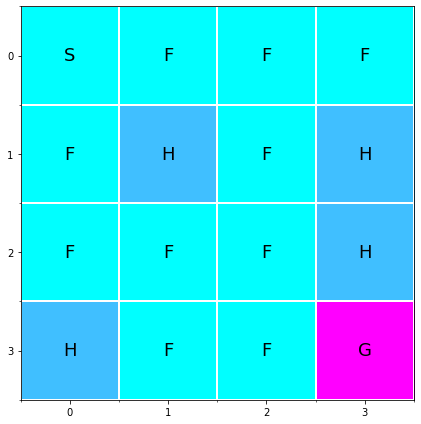

In [120]:
# value iteration
cmap = 'cool'
s = 4
opt = "{}x{}".format(s,s)
sz = (s,s)
env = gym.make("FrozenLake-v1", map_name=opt)
env.reset()
env.render()
visualize_env(env, opt)

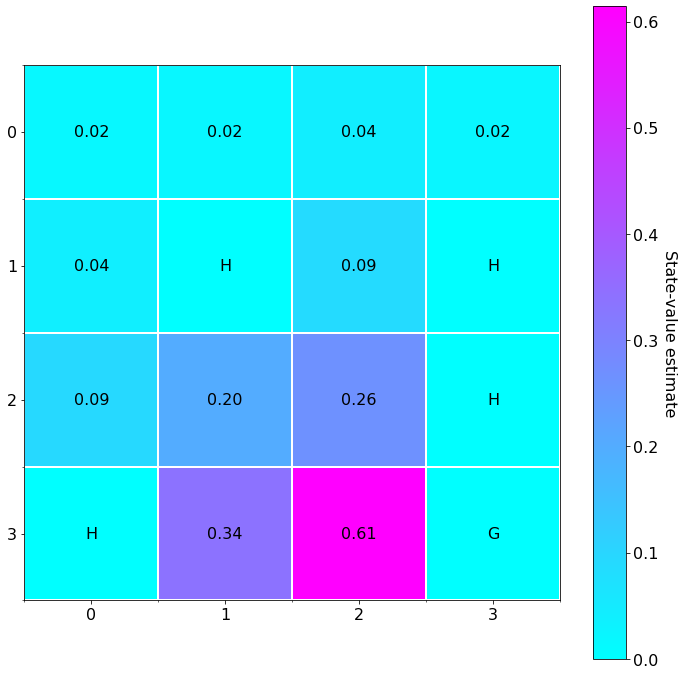

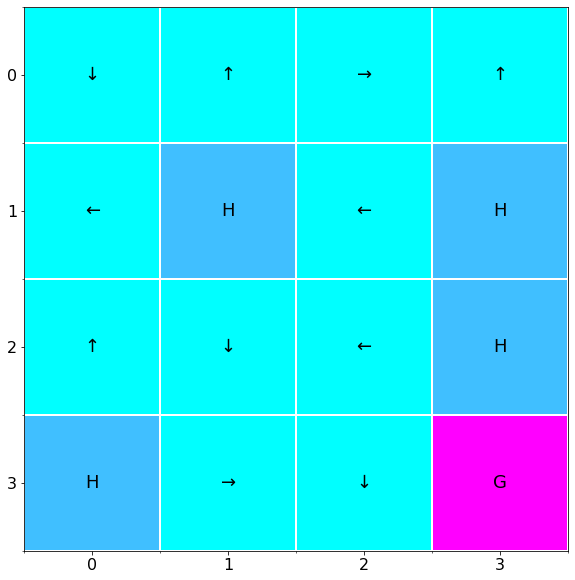

10


In [193]:
env = gym.make("FrozenLake-v1", map_name=opt)
env.reset()

r, p = getRewardProb(env,4)
vi = mdp.ValueIteration(p, r, 0.9, max_iter=100)
vi.run()
visualize_value(vi.V, (4,4), "4x4")
visualize_policy(vi.policy, (4,4), "4x4")
print(vi.iter)

In [146]:
import matplotlib as mpl
mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=16)
mpl.rc('ytick', labelsize=16)

In [214]:
def valueIterateGraph(p, r, value_iterate=True):
    max_vs = []
    mean_vs = []
    errors = []
    rewards = []
    iterations = []
    gammas = list(np.arange(0.5,1,0.06))
    print(gammas)
    for gamma in gammas:
        if value_iterate:
            vi = mdp.ValueIteration(p, r, gamma)
        else:
            vi = mdp.PolicyIteration(p, r, gamma, max_iter=5)
        vi.run()
        vi.run_stats
        iterations.append(list(range(1,len(vi.run_stats)+1)))
        max_vs.append([el['Max V'] for el in vi.run_stats])
        mean_vs.append([el['Mean V'] for el in vi.run_stats])
        errors.append([el['Error'] for el in vi.run_stats])
        rewards.append([el['Reward'] for el in vi.run_stats])

    f, ax = plt.subplots(2,2, figsize=(15,12), sharex=True)
#     ax[0][0].set_title("Max V", fontsize=16)
    for i in range(len(max_vs)):
        ax[0][0].plot(iterations[i], max_vs[i]
                      , alpha=1
                      , marker='o'
                      , label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[0][0].legend(fontsize=16)
    ax[0][0].set_xlabel("# Iterations")
    ax[0][0].set_ylabel("Max V")

#     ax[0][1].set_title("Mean V", fontsize=16)
    for i in range(len(mean_vs)):
        ax[0][1].plot(iterations[i], mean_vs[i]
                      , alpha=1
                      , marker='o'
                      , label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[0][1].legend(fontsize=16)
    ax[0][1].set_xlabel("# Iterations")
    ax[0][1].set_ylabel("Mean V")
    
    

#     ax[1][0].set_title("Error", fontsize=16)
    for i in range(len(errors)):
        ax[1][0].plot(iterations[i], errors[i]
                      , alpha=1
                      , marker='o'
                      , label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[1][0].legend(fontsize=16)
    ax[1][0].set_xlabel("# Iterations")
    ax[1][0].set_ylabel("Error")

#     ax[1][1].set_title("Reward", fontsize=16)
    for i in range(len(max_vs)):
        ax[1][1].plot(iterations[i], rewards[i]
                      , alpha=1
                      , marker='o'
                      , label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[1][1].legend(fontsize=16)
    ax[1][1].set_xlabel("# Iterations")
    ax[1][1].set_ylabel("Reward")
    plt.plot()

[0.5, 0.56, 0.6200000000000001, 0.6800000000000002, 0.7400000000000002, 0.8000000000000003, 0.8600000000000003, 0.9200000000000004, 0.9800000000000004]


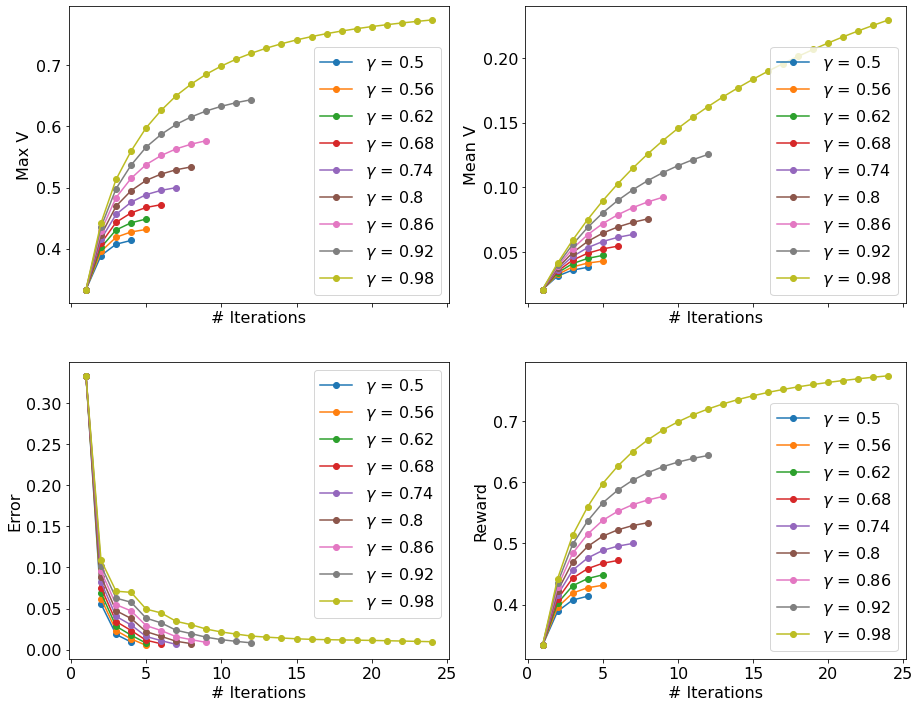

In [173]:
valueIterateGraph(p, r, value_iterate=True)

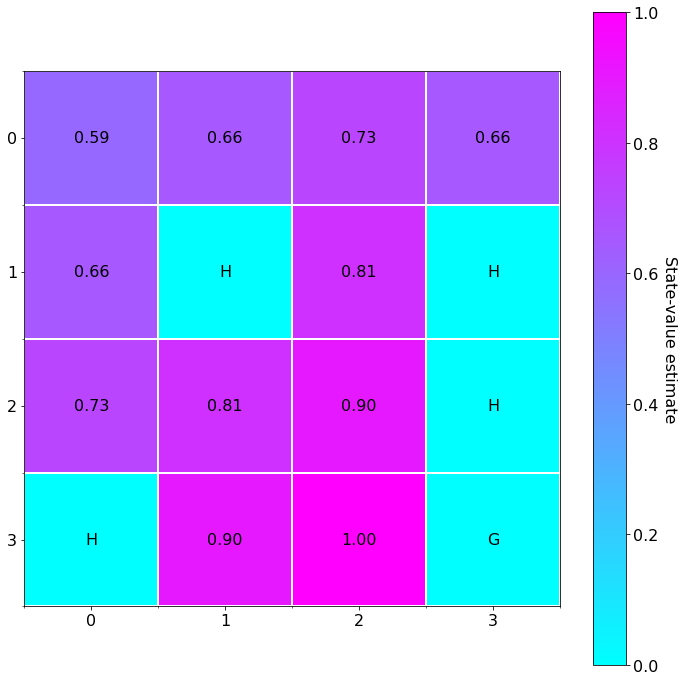

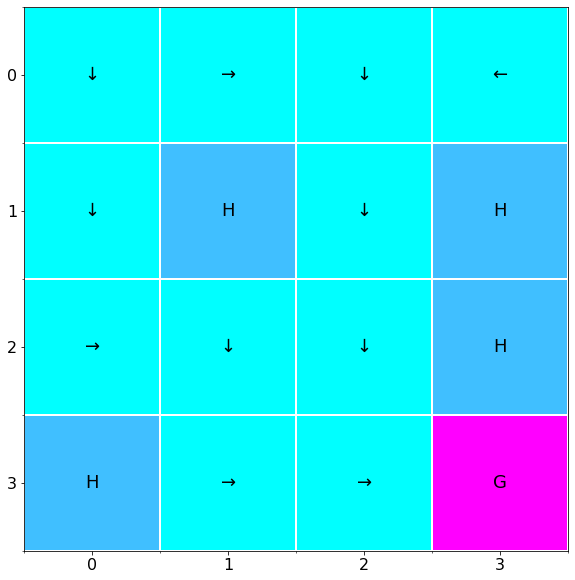

7


In [190]:
env = gym.make("FrozenLake-v1", is_slippery=False)
env.reset()

r, p = getRewardProb(env,4)


vi = mdp.ValueIteration(p, r, 0.9, max_iter=100)
vi.run()
visualize_value(vi.V, (4,4), "4x4")
visualize_policy(vi.policy, (4,4), "4x4")
print(vi.iter)

policy iteration

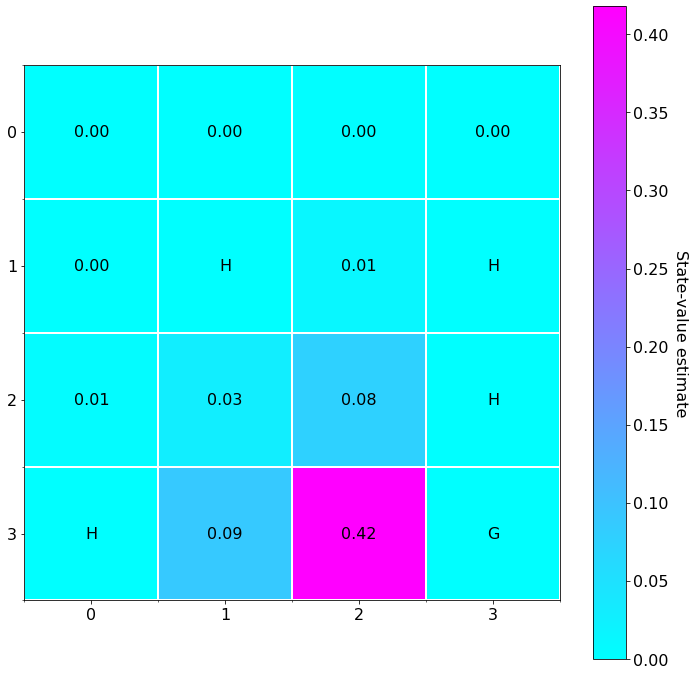

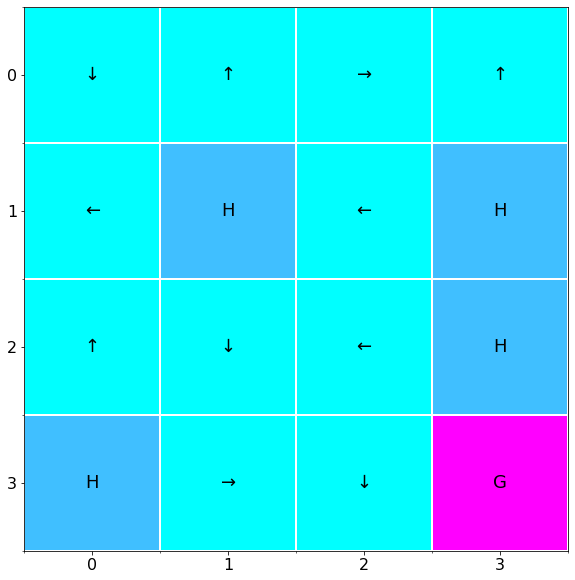

4


In [208]:
env = gym.make("FrozenLake-v1", map_name=opt)
env.reset()

r, p = getRewardProb(env,4)
vi = mdp.PolicyIteration(p, r, 0.5, max_iter=100)
vi.run()
visualize_value(vi.V, (4,4), "4x4")
visualize_policy(vi.policy, (4,4), "4x4")
print(vi.iter)

[0.5, 0.56, 0.6200000000000001, 0.6800000000000002, 0.7400000000000002, 0.8000000000000003, 0.8600000000000003, 0.9200000000000004, 0.9800000000000004]


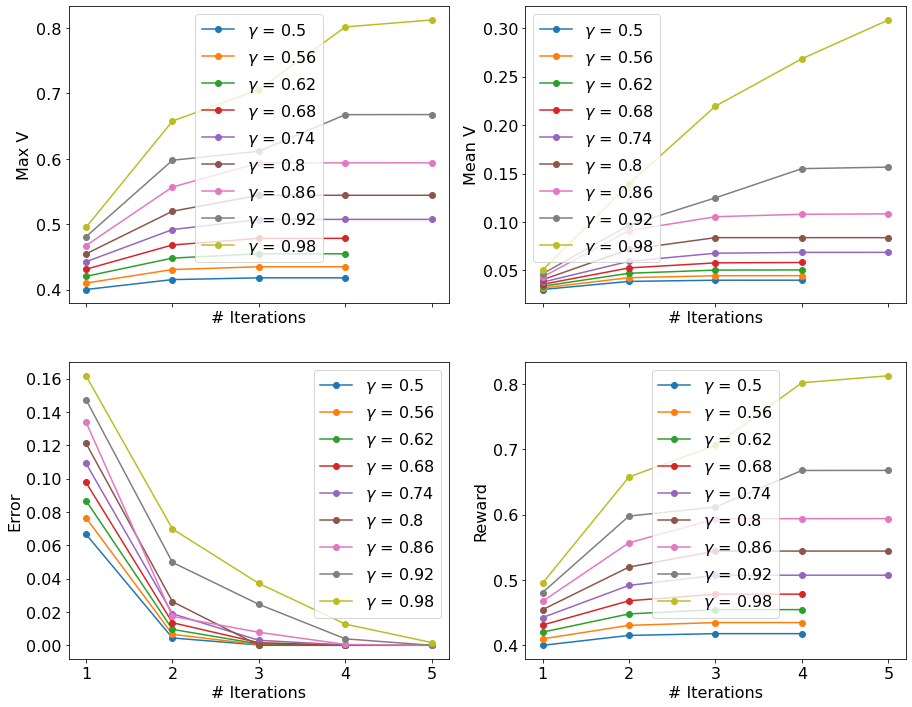

In [215]:
valueIterateGraph(p, r, value_iterate=False)

Q-learning

In [263]:
def QLearnGraphGammas(p, r):
    max_vs = []
    mean_vs = []
    errors = []
    rewards = []
    iterations = []
    gammas = [0.5, 0.6, 0.7, 0.8, 0.9]
    for gamma in gammas:
        vi = mdp.QLearning(p, r, gamma=gamma, alpha=0.1
                           , alpha_decay=0.99999, epsilon=1, epsilon_decay=0.9999, n_iter=50000)
        vi.run()
        vi.run_stats
        iterations.append(list(range(1,len(vi.run_stats)+1)))
        max_vs.append([el['Max V'] for el in vi.run_stats])
        mean_vs.append([el['Mean V'] for el in vi.run_stats])
        errors.append([el['Error'] for el in vi.run_stats])
        rewards.append([el['Reward'] for el in vi.run_stats])

    f, ax = plt.subplots(2,2, figsize=(15,12))
    
    for i in range(len(max_vs)):
        ax[0][0].plot(iterations[i], max_vs[i], alpha=1, label="$\gamma$= {}".format(np.round(gammas[i],3)))
    ax[0][0].legend(fontsize=16)
    ax[0][0].set_xlabel("# Iterations")
    ax[0][0].set_ylabel("Max V", fontsize=16)
#     ax[0][0].set_xlim(0,20000)

    
    for i in range(len(mean_vs)):
        ax[0][1].plot(iterations[i], mean_vs[i], alpha=1, label="$\gamma$= {}".format(np.round(gammas[i],3)))
    ax[0][1].legend(fontsize=16)
    ax[0][1].set_xlabel("# Iterations")
    ax[0][1].set_ylabel("Mean V", fontsize=16)
#     ax[0][1].set_xlim(0,20000)

 
    for i in range(len(errors)):
        ax[1][0].plot(iterations[i], errors[i], alpha=1, label="$\gamma$= {}".format(np.round(gammas[i],3)))
    ax[1][0].legend(fontsize=16)
    ax[1][0].set_xlabel("# Iterations")
    ax[1][0].set_ylabel("Error", fontsize=16)
#     ax[1][0].set_xlim(0,20000)

    
    for i in range(len(max_vs)):
        ax[1][1].plot(iterations[i], rewards[i], alpha=1, label="$\gamma$= {}".format(np.round(gammas[i],3)))
    ax[1][1].legend(fontsize=16)
    ax[1][1].set_xlabel("# Iterations")
    ax[1][1].set_ylabel("Reward", fontsize=16)
#     ax[1][1].set_xlim(0,20000)
    
    plt.plot()

In [280]:
def QLearnGraphEpsilons(p, r):
    max_vs = []
    mean_vs = []
    errors = []
    rewards = []
    iterations = []
    epsilons = [0, 0.2, 0.4, 0.6, 0.8, 1]
    for epsilon in epsilons:
        vi = mdp.QLearning(p, r, gamma=0.9, alpha=0.1
                           , alpha_decay=0.99999, epsilon=epsilon, epsilon_decay=0.9999, n_iter=50000)
        vi.run()
        vi.run_stats
        iterations.append(list(range(1,len(vi.run_stats)+1)))
        max_vs.append([el['Max V'] for el in vi.run_stats])
        mean_vs.append([el['Mean V'] for el in vi.run_stats])
        errors.append([el['Error'] for el in vi.run_stats])
        rewards.append([el['Reward'] for el in vi.run_stats])

    f, ax = plt.subplots(2,2, figsize=(15,12))

    for i in range(len(max_vs)):
        ax[0][0].plot(iterations[i], max_vs[i], alpha=1, label="$\epsilon$= {}".format(np.round(epsilons[i],3)))
    ax[0][0].legend(fontsize=16)
    ax[0][0].set_xlabel("# Iterations")
    ax[0][0].set_ylabel("Max V", fontsize=16)
    ax[0][0].set_xlim(0,10000)


    for i in range(len(mean_vs)):
        ax[0][1].plot(iterations[i], mean_vs[i], alpha=1, label="$\epsilon$= {}".format(np.round(epsilons[i],3)))
    ax[0][1].legend(fontsize=16)
    ax[0][1].set_xlabel("# Iterations")
    ax[0][1].set_ylabel("Mean V", fontsize=16)
    ax[0][1].set_xlim(0,10000)


    for i in range(len(errors)):
        ax[1][0].plot(iterations[i], errors[i], alpha=1, label="$\epsilon$= {}".format(np.round(epsilons[i],3)))
    ax[1][0].legend(fontsize=16)
    ax[1][0].set_xlabel("# Iterations")
    ax[1][0].set_ylabel("Error", fontsize=16)
    ax[1][0].set_xlim(0,10000)


    for i in range(len(max_vs)):
        ax[1][1].plot(iterations[i], rewards[i], alpha=1, label="$\epsilon$= {}".format(np.round(epsilons[i],3)))
    ax[1][1].legend(fontsize=16)
    ax[1][1].set_xlabel("# Iterations")
    ax[1][1].set_ylabel("Reward", fontsize=16)
    ax[1][1].set_xlim(0,10000)
    
    plt.plot()

In [284]:
def QLearnGraphAlphas(p, r):
    max_vs = []
    mean_vs = []
    errors = []
    rewards = []
    iterations = []
    alphas = [0, 0.2, 0.4, 0.6, 0.8, 0.9]
    for alpha in alphas:
        vi = mdp.QLearning(p, r, gamma=0.9, alpha=alpha
                           , alpha_decay=0.99999, epsilon=1, epsilon_decay=0.9999, n_iter=50000)
        vi.run()
        vi.run_stats
        iterations.append(list(range(1,len(vi.run_stats)+1)))
        max_vs.append([el['Max V'] for el in vi.run_stats])
        mean_vs.append([el['Mean V'] for el in vi.run_stats])
        errors.append([el['Error'] for el in vi.run_stats])
        rewards.append([el['Reward'] for el in vi.run_stats])

    f, ax = plt.subplots(2,2, figsize=(15,12))

    for i in range(len(max_vs)):
        ax[0][0].plot(iterations[i], max_vs[i], label="alpha= {}".format(np.round(alphas[i],3)))
    ax[0][0].legend(fontsize=16)
    ax[0][0].set_xlabel("# Iterations")
    ax[0][0].set_ylabel("Max V", fontsize=16)
    ax[0][0].set_xlim(0,10000)


    for i in range(len(mean_vs)):
        ax[0][1].plot(iterations[i], mean_vs[i], label="alpha= {}".format(np.round(alphas[i],3)))
    ax[0][1].legend(fontsize=16)
    ax[0][1].set_xlabel("# Iterations")
    ax[0][1].set_ylabel("Mean V", fontsize=16)
    ax[0][1].set_xlim(0,10000)


    for i in range(len(errors)):
        ax[1][0].plot(iterations[i], errors[i], label="alpha= {}".format(np.round(alphas[i],3)))
    ax[1][0].legend(fontsize=16)
    ax[1][0].set_xlabel("# Iterations")
    ax[1][0].set_ylabel("Error", fontsize=16)
    ax[1][0].set_xlim(0,10000)


    for i in range(len(max_vs)):
        ax[1][1].plot(iterations[i], rewards[i], label="alpha= {}".format(np.round(alphas[i],3)))
    ax[1][1].legend(fontsize=16)
    ax[1][1].set_xlabel("# Iterations")
    ax[1][1].set_ylabel("Reward", fontsize=16)
    ax[1][1].set_xlim(0,10000)
    
    plt.plot()

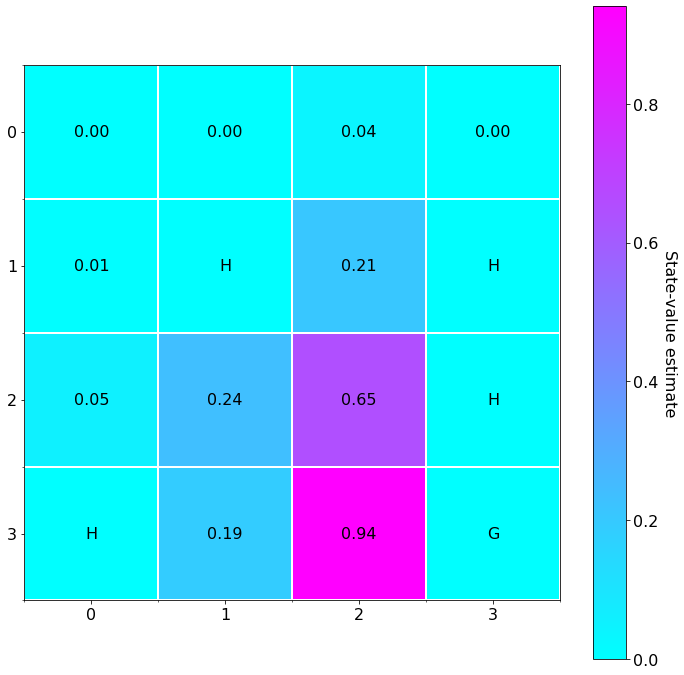

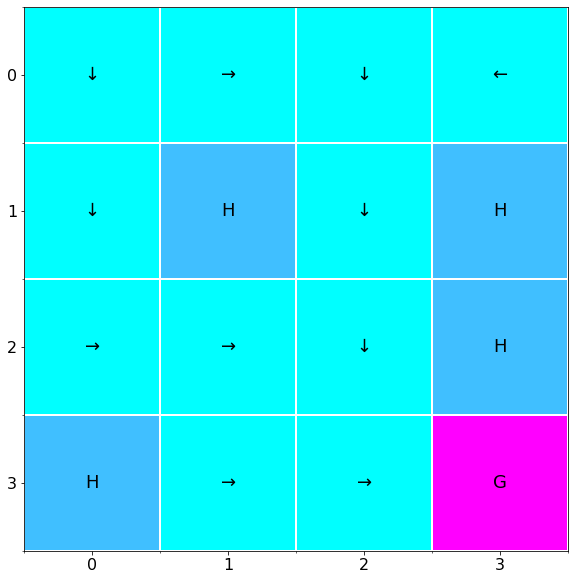

In [235]:
s = 4
opt = "{}x{}".format(s,s)
sz = (s,s)
env = gym.make("FrozenLake-v1", is_slippery=False)
env.reset()

r, p = getRewardProb(env, s)

vi = mdp.QLearning(p, r, gamma=0.9
                    , alpha=0.9, alpha_decay=0.99
                    , epsilon=0.1, epsilon_decay=0.001
                    , n_iter=500000)

vi.run()
visualize_value(vi.V, sz, opt)
visualize_policy(vi.policy, sz, opt)

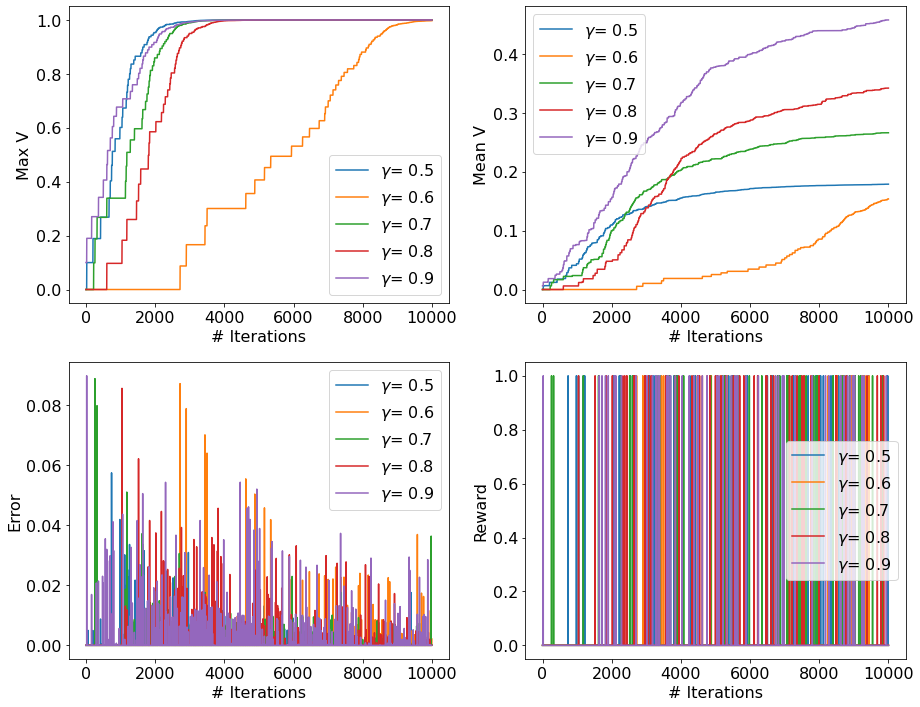

In [264]:
QLearnGraphGammas(p, r)

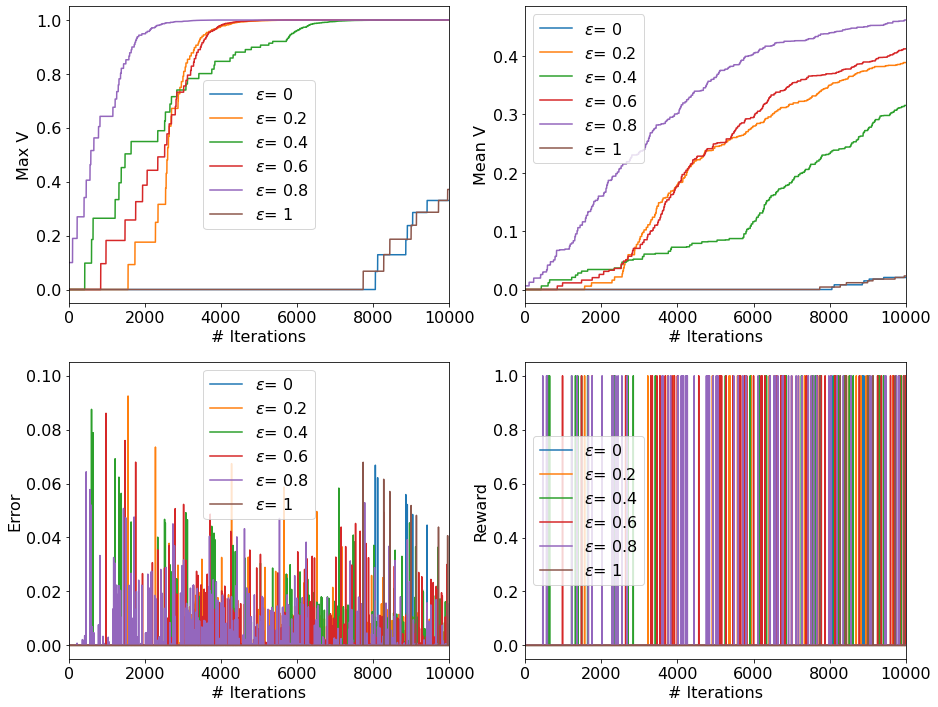

In [275]:
QLearnGraphEpsilons(p, r)

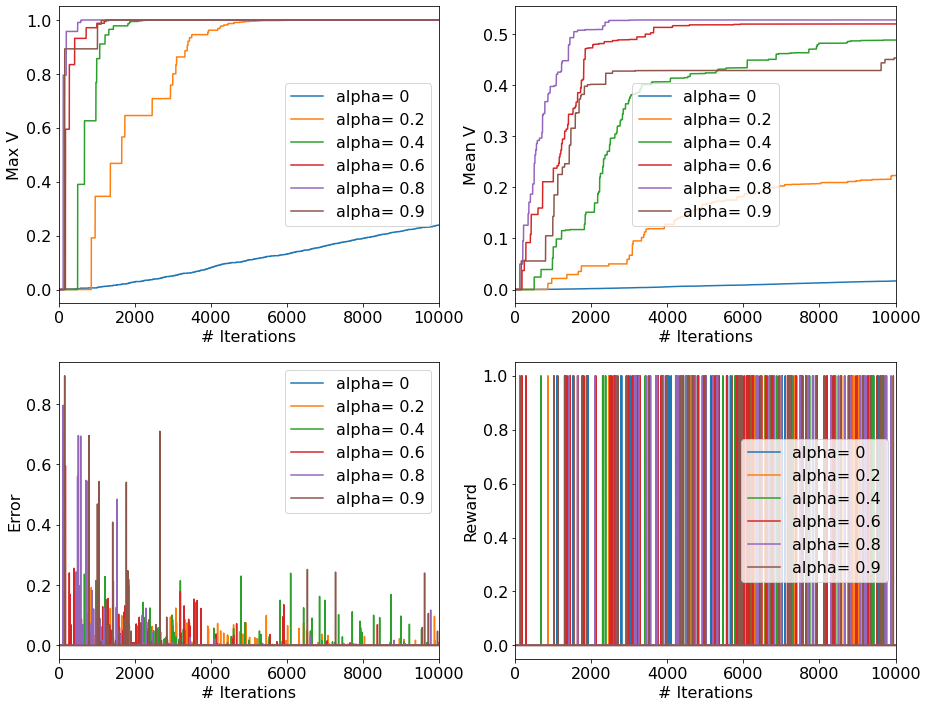

In [285]:
QLearnGraphAlphas(p, r)

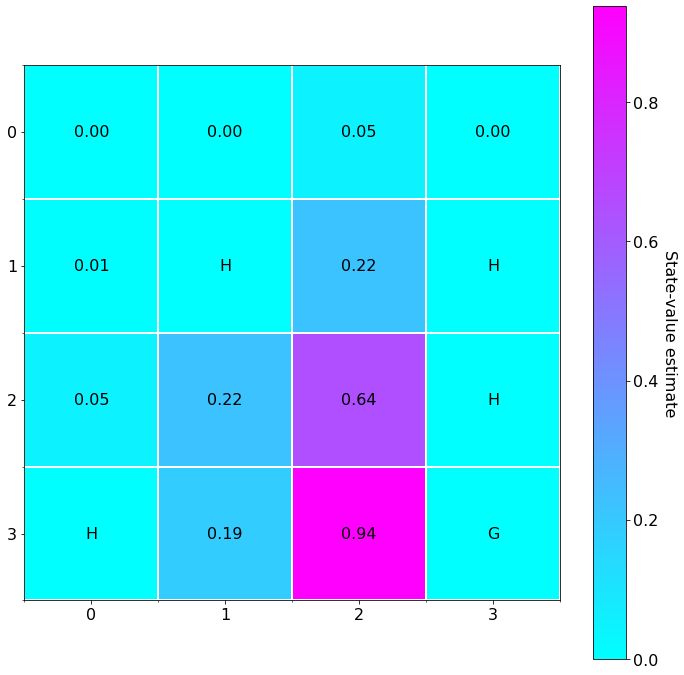

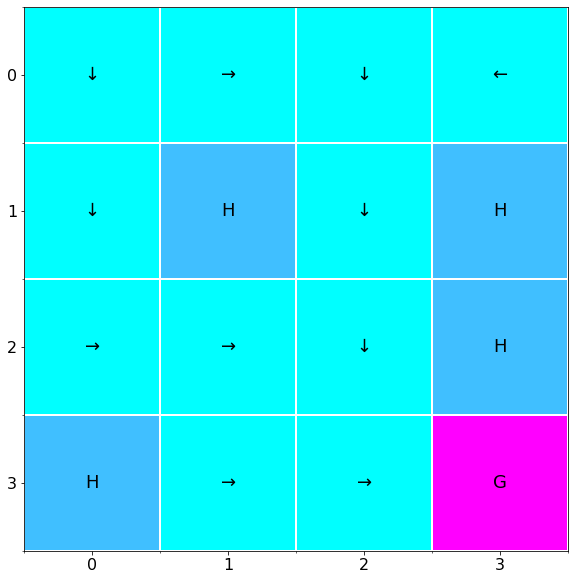

In [286]:
s = 4
opt = "{}x{}".format(s,s)
sz = (s,s)
env = gym.make("FrozenLake-v1", is_slippery=False)
env.reset()

r, p = getRewardProb(env, s)

vi = mdp.QLearning(p, r, gamma=0.9
                    , alpha=0.9, alpha_decay=0.99
                    , epsilon=0.9, epsilon_decay=0.09
                    , n_iter=500000)

vi.run()
visualize_value(vi.V, sz, opt)
visualize_policy(vi.policy, sz, opt)